In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Dataset Airbnb Europe.csv")

In [4]:
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


<Axes: >

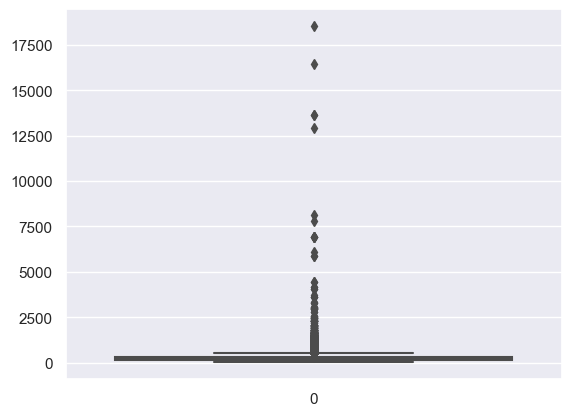

In [87]:
sns.boxplot(df['Price'])

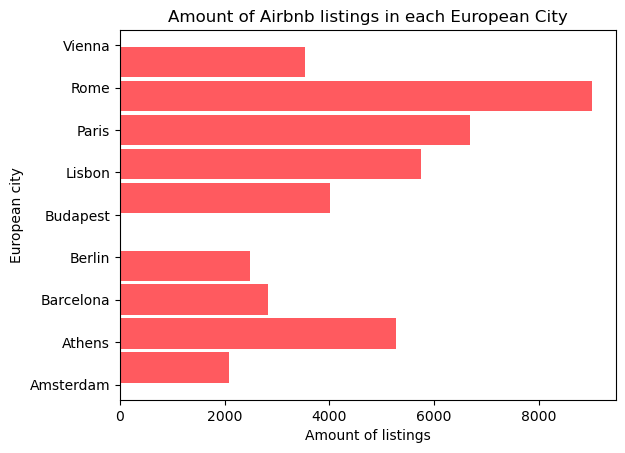

In [9]:
plt.hist(df['City'],rwidth=0.9,color='#FF5A5F',orientation='horizontal')
plt.xlabel('Amount of listings')
plt.ylabel('European city')
plt.title('Amount of Airbnb listings in each European City')
plt.show()

Text(0.5, 1.0, 'Mean price of Airbnb listing per European city')

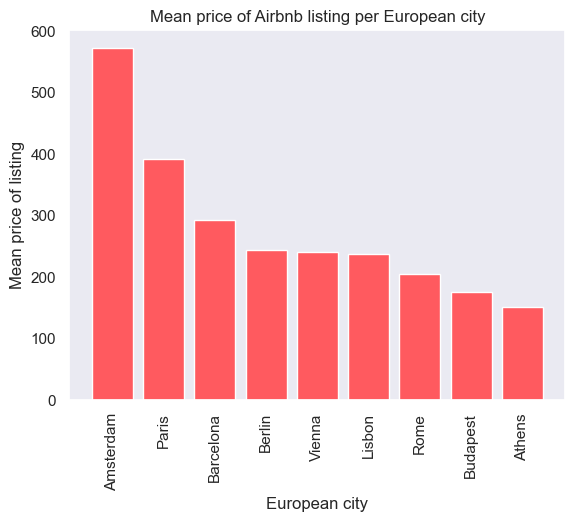

In [57]:
mean_price = df.groupby('City')['Price'].mean().sort_values(ascending=False)
plt.bar(mean_price.index,mean_price,color='#FF5A5F')
plt.xticks(rotation=90)
plt.grid(False)
plt.xlabel('European city')
plt.ylabel('Mean price of listing')
plt.title('Mean price of Airbnb listing per European city')

Text(0.5, 1.0, 'Mean price of Airbnb listing for weekend or weekday')

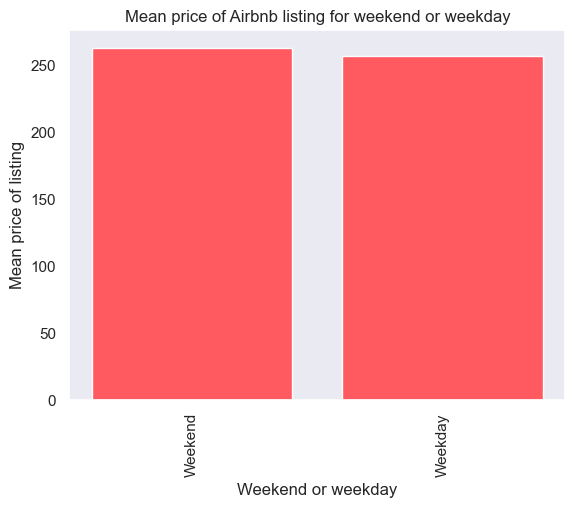

In [58]:
mean_price_day = df.groupby('Day')['Price'].mean().sort_values(ascending=False)
plt.bar(mean_price_day.index,mean_price_day,color='#FF5A5F')
plt.xticks(rotation=90)
plt.grid(False)
plt.xlabel('Weekend or weekday')
plt.ylabel('Mean price of listing')
plt.title('Mean price of Airbnb listing for weekend or weekday')

In [14]:
cormat = df.corr(numeric_only=True)

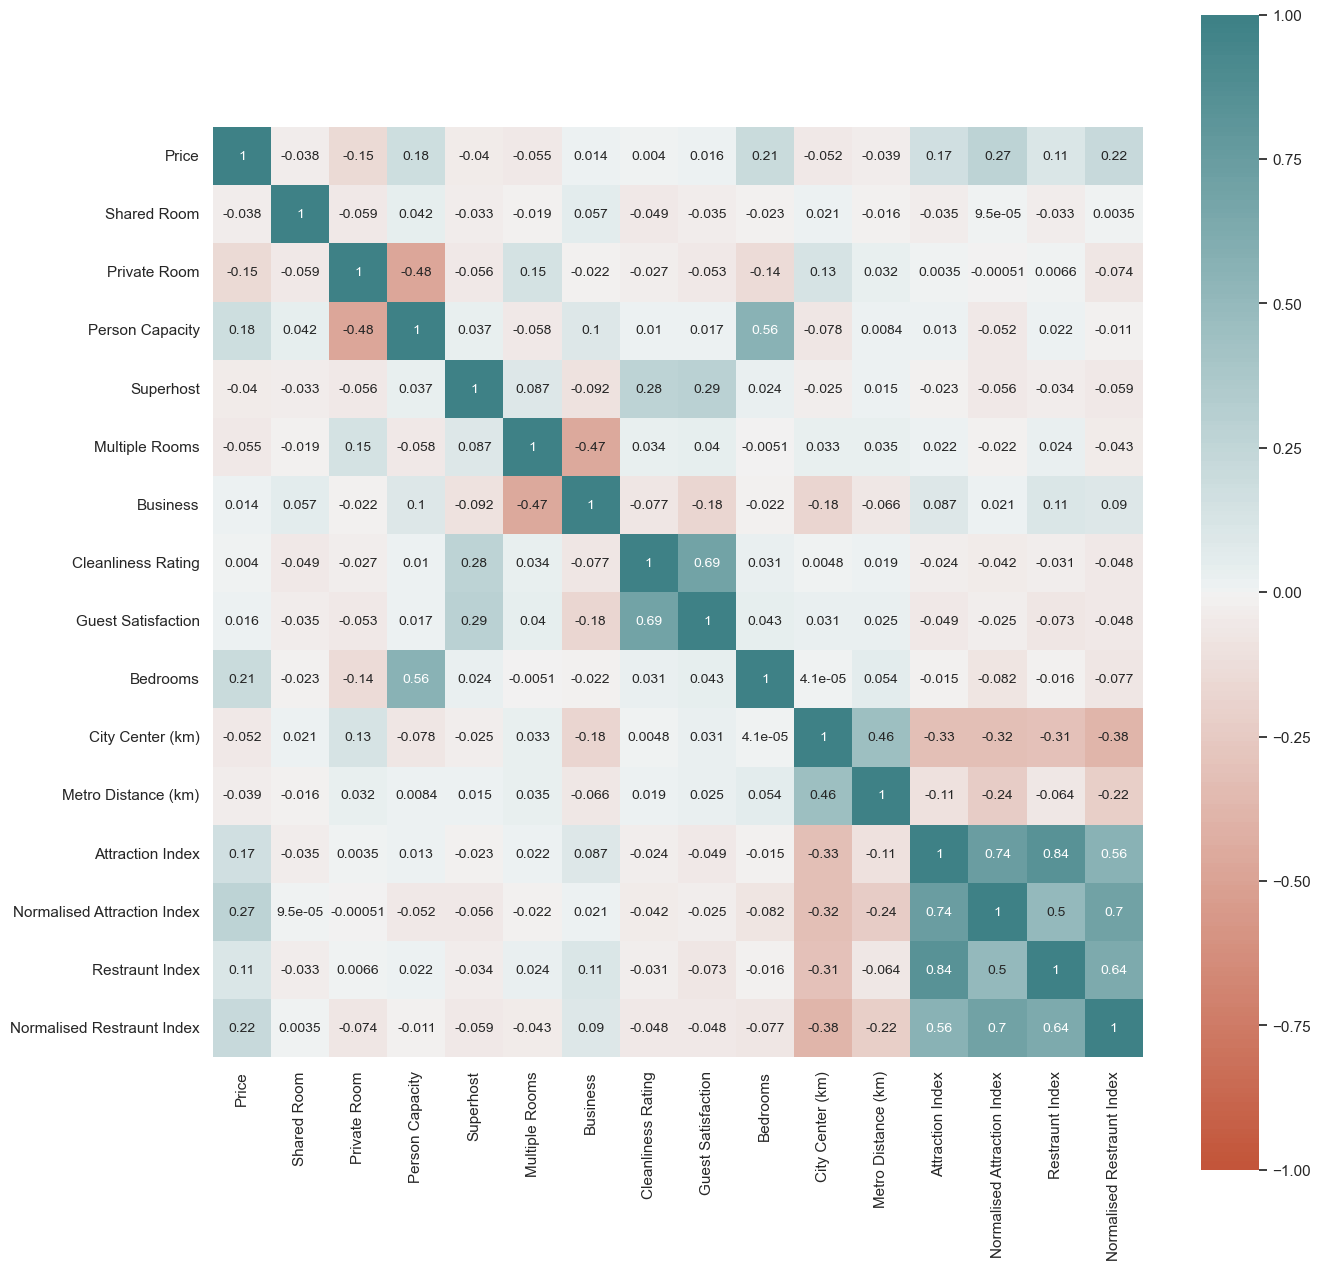

In [20]:
plt.figure(figsize = (15,15))

sns.set(font_scale=1)
ax = sns.heatmap(
    cormat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,annot=True, annot_kws={'size': 10})


### -> Veel correlatie tussen Attraction Index & Restaurant Index maar ook tussen Guest Satisfaction & Cleanliness Rating

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
c:\Users\nienk\JupyterJads\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


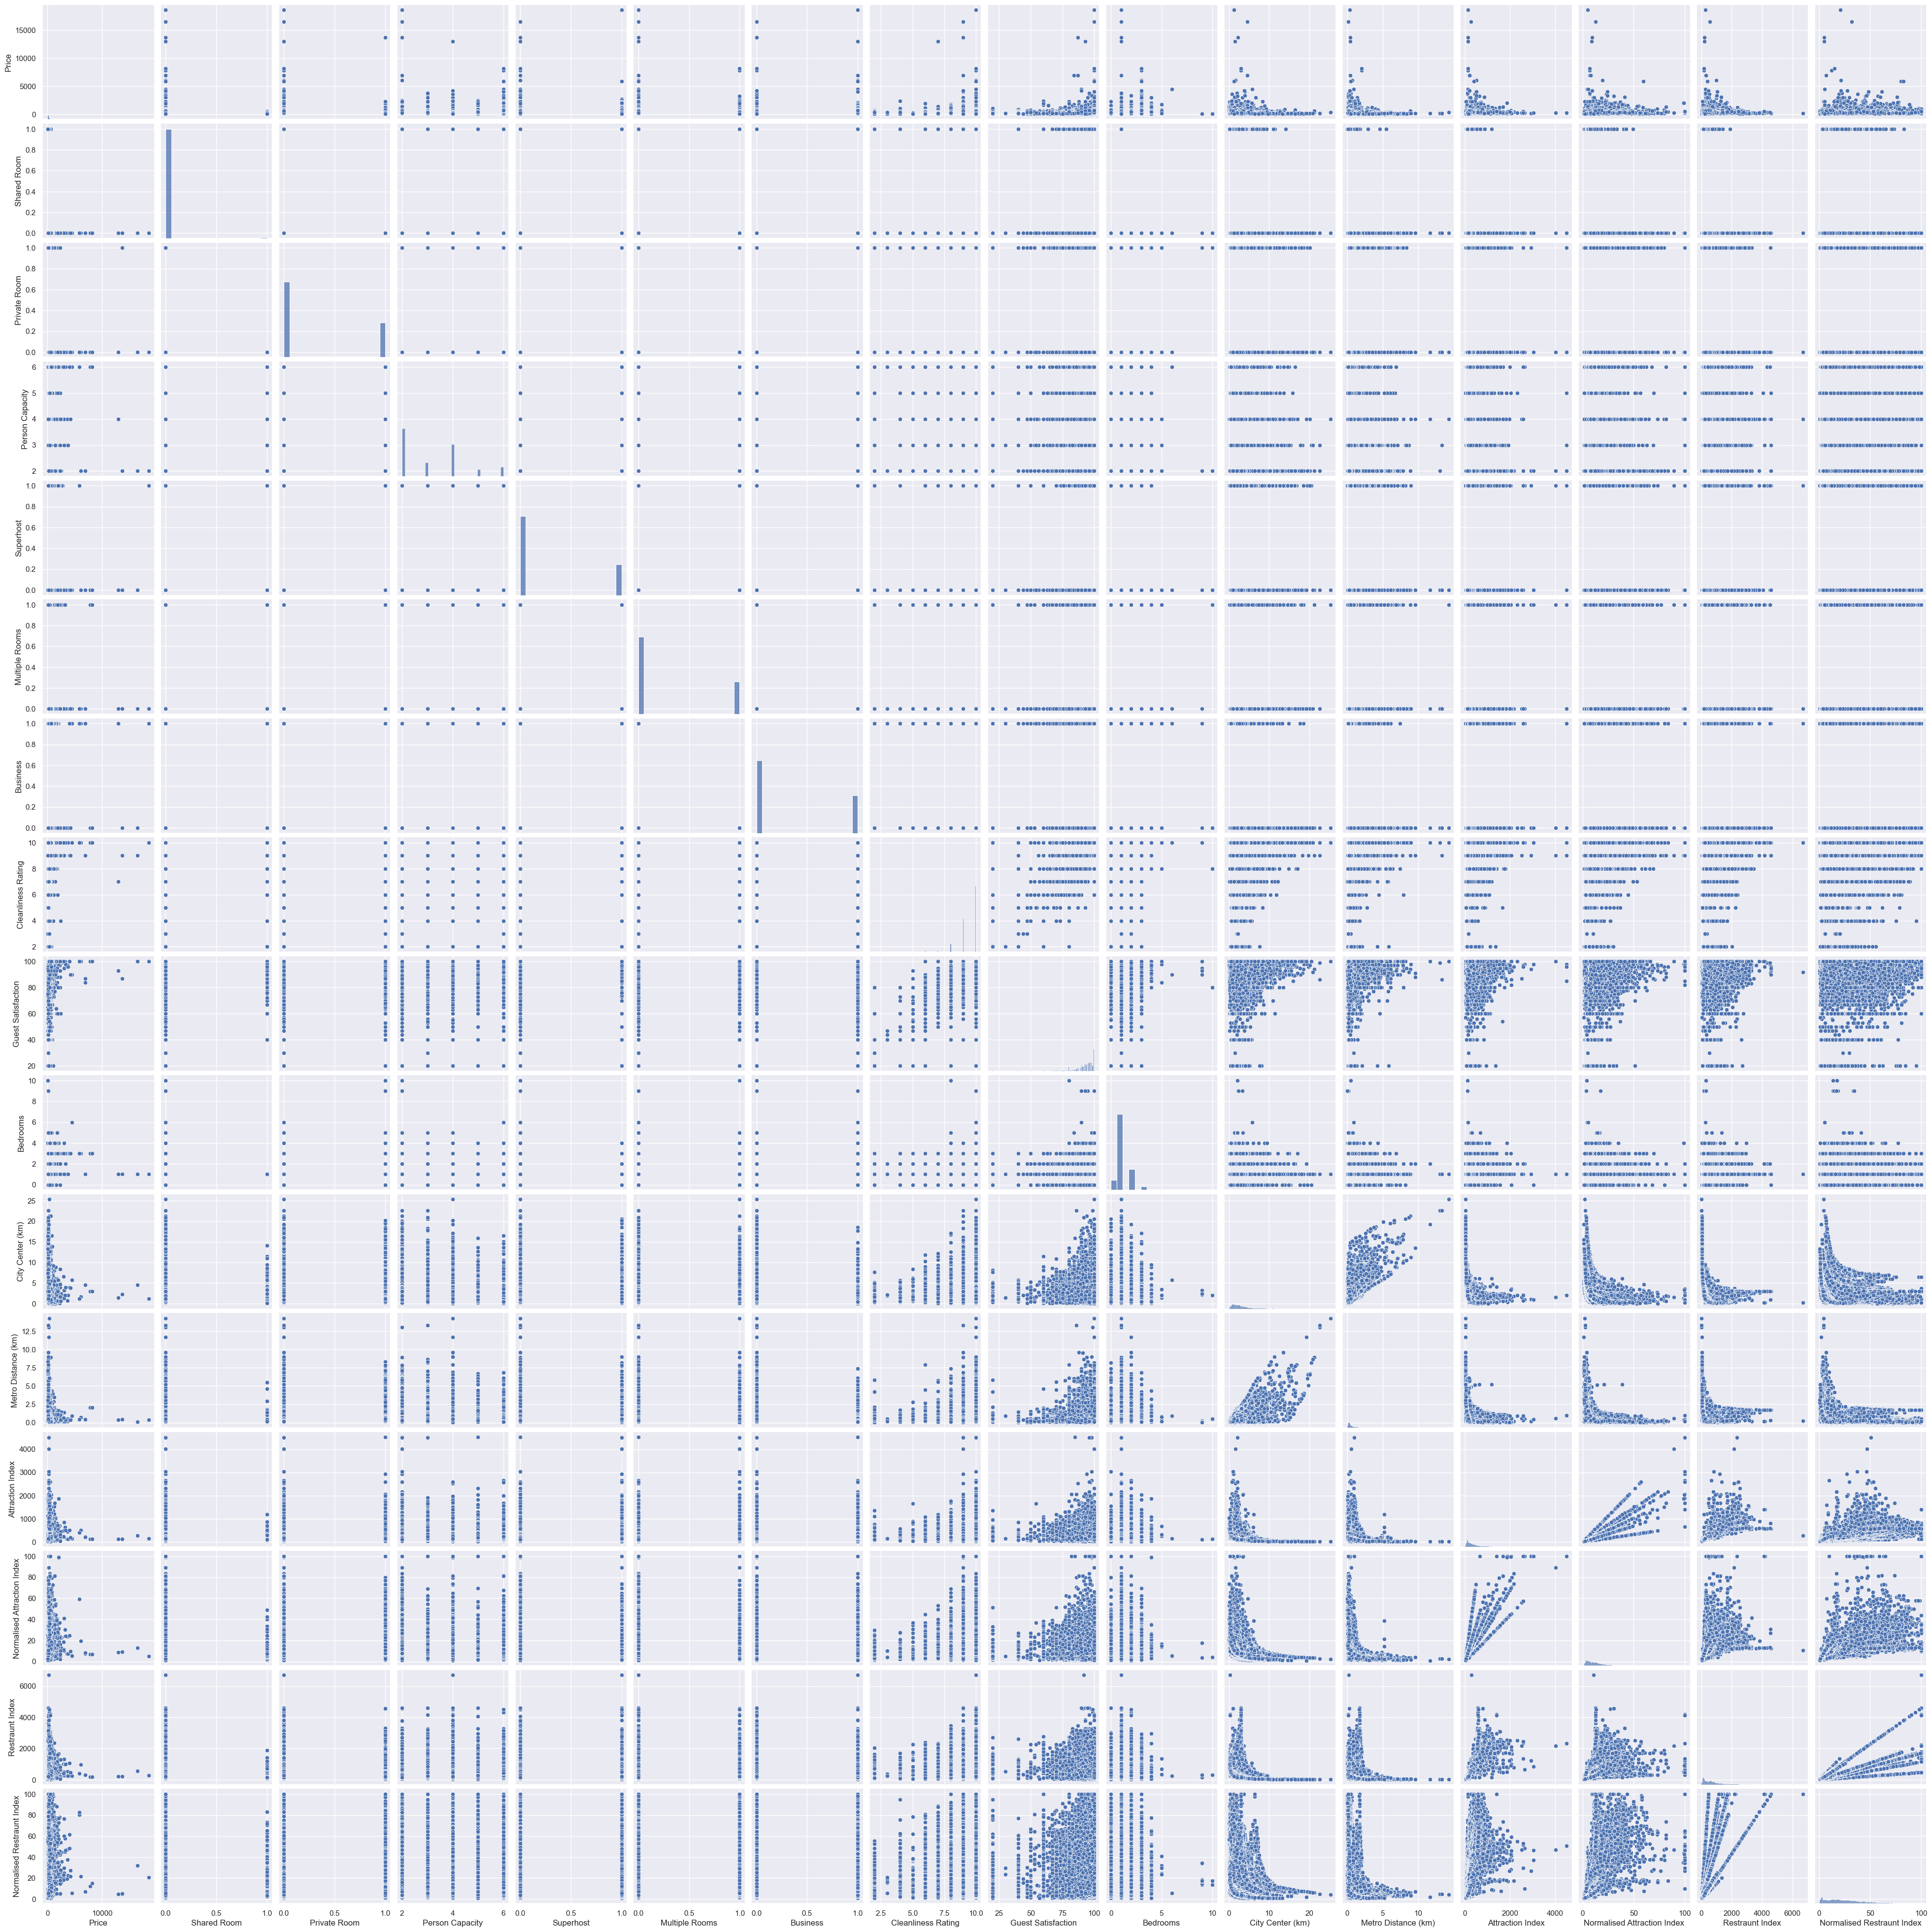

In [21]:
sns.pairplot(df)

In [38]:
## Check for missing values in dataset:
df.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

In [60]:
df.dtypes

City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                       bool
Private Room                      bool
Person Capacity                float64
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
dtype: object

## Feature Scaling

In [80]:
X = df.loc[:,df.columns != 'Price']
y = df['Price']

num_cols = X.dtypes[X.dtypes == 'float64'].index.to_list()
num_cols2 = X.dtypes[X.dtypes == 'int64'].index.to_list()
num_cols = num_cols + num_cols2


cat_cols = []
for col in X.columns:
    if col not in num_cols:
        cat_cols.append(col)

In [81]:
X_num = X[num_cols]
X_cat = X[cat_cols]

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [83]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns= num_cols)

In [84]:
X_scaled = pd.concat([X_num_scaled, X_cat], axis=1)

In [85]:
X_scaled

,Person Capacity,Cleanliness Rating,Guest Satisfaction,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Multiple Rooms,Business,Bedrooms,City,Day,Room Type,Shared Room,Private Room,Superhost
0,-0.952126,0.627249,-0.012673,1.173545,2.740676,-0.912908,-0.901408,-1.014982,-1.012052,1.544895,-0.719629,-0.260033,Amsterdam,Weekday,Private room,False,True,False
1,0.586994,-1.622059,-0.995275,-1.097534,-0.516168,1.430644,2.589974,0.404481,1.773897,-0.647293,-0.719629,-0.260033,Amsterdam,Weekday,Private room,False,True,False
2,-0.952126,-0.497405,-0.749625,1.536826,4.315647,-0.927392,-0.922985,-1.020489,-1.022859,-0.647293,1.389604,-0.260033,Amsterdam,Weekday,Private room,False,True,False
3,0.586994,-0.497405,-0.381149,-1.149384,-0.232293,0.845679,1.718504,0.476992,1.916214,-0.647293,1.389604,1.307000,Amsterdam,Weekday,Private room,False,True,False
4,-0.952126,0.627249,0.601453,-1.069313,-0.403893,1.098313,2.094874,0.362273,1.691057,-0.647293,-0.719629,-0.260033,Amsterdam,Weekday,Private room,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,2.126114,0.627249,0.847104,-1.076604,-0.663374,-0.316031,0.476485,-0.360972,-0.808738,-0.647293,1.389604,2.874032,Vienna,Weekend,Entire home/apt,False,False,False
41710,-0.952126,-1.622059,-0.872450,-0.936357,-0.712380,-0.377251,0.353136,-0.546463,-0.935016,-0.647293,-0.719629,-0.260033,Vienna,Weekend,Entire home/apt,False,False,False
41711,-0.952126,0.627249,-0.012673,-0.844280,-0.568370,-0.529519,0.046337,-0.661488,-1.013322,-0.647293,-0.719629,-0.260033,Vienna,Weekend,Entire home/apt,False,False,False
41712,-0.952126,0.627249,-0.749625,0.182458,-0.448155,-0.783337,-0.465071,-0.899144,-1.175112,-0.647293,-0.719629,-0.260033,Vienna,Weekend,Private room,False,True,False


## Train & Testset (Validation????)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)